In [341]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd
import plotly.express as px

Gather data and choose columns to use; make dataframe

In [342]:
#Import data
df = pd.read_csv(os.path.join("1Qtr_EQ.csv"), parse_dates=['time'], usecols = ['time', 'latitude', 'longitude', 'depth', 'mag', 'place'])
df

,time,latitude,longitude,depth,mag,place
0,2022-03-31 23:47:44.170000+00:00,17.943333,-66.996500,5.77,2.50,"6 km ESE of La Parguera, Puerto Rico"
1,2022-03-31 23:32:34.458000+00:00,-22.807000,171.084500,10.00,4.60,southeast of the Loyalty Islands
2,2022-03-31 23:18:16.617000+00:00,-4.807800,139.426700,10.00,5.20,"252 km NW of Kiunga, Papua New Guinea"
3,2022-03-31 23:13:42.735000+00:00,-22.881900,170.807100,10.00,4.40,southeast of the Loyalty Islands
4,2022-03-31 23:13:07.561000+00:00,41.419300,72.909700,10.00,4.20,"44 km NNE of Bazar-Korgon, Kyrgyzstan"
...,...,...,...,...,...,...
7015,2022-01-01 02:17:56.815000+00:00,38.725100,73.482700,105.79,4.20,"74 km NW of Murghob, Tajikistan"
7016,2022-01-01 01:38:57.636000+00:00,52.922000,-163.660500,10.00,3.10,"194 km SE of Akutan, Alaska"
7017,2022-01-01 00:27:51.990000+00:00,40.477167,-124.322333,19.08,2.88,"12km SSW of Ferndale, CA"
7018,2022-01-01 00:10:28.735000+00:00,-8.763300,124.351300,104.90,4.10,"48 km N of Pante Makasar, Timor Leste"


In [343]:
#To check data types
df.dtypes

time         datetime64[ns, UTC]
latitude                 float64
longitude                float64
depth                    float64
mag                      float64
place                     object
dtype: object

In [344]:
#To check data file type
type(df)

pandas.core.frame.DataFrame

Make a copy of the dataframe in case of error

In [345]:
#To copy datafile to work with
df2 = df.copy()
print(df2)

                                 time   latitude   longitude   depth   mag  \
0    2022-03-31 23:47:44.170000+00:00  17.943333  -66.996500    5.77  2.50   
1    2022-03-31 23:32:34.458000+00:00 -22.807000  171.084500   10.00  4.60   
2    2022-03-31 23:18:16.617000+00:00  -4.807800  139.426700   10.00  5.20   
3    2022-03-31 23:13:42.735000+00:00 -22.881900  170.807100   10.00  4.40   
4    2022-03-31 23:13:07.561000+00:00  41.419300   72.909700   10.00  4.20   
...                               ...        ...         ...     ...   ...   
7015 2022-01-01 02:17:56.815000+00:00  38.725100   73.482700  105.79  4.20   
7016 2022-01-01 01:38:57.636000+00:00  52.922000 -163.660500   10.00  3.10   
7017 2022-01-01 00:27:51.990000+00:00  40.477167 -124.322333   19.08  2.88   
7018 2022-01-01 00:10:28.735000+00:00  -8.763300  124.351300  104.90  4.10   
7019 2022-01-01 00:02:24.512000+00:00 -17.026900 -174.214200   60.87  4.60   

                                      place  
0      6 km ESE o

In [346]:
#To check copied file
df2.dtypes

time         datetime64[ns, UTC]
latitude                 float64
longitude                float64
depth                    float64
mag                      float64
place                     object
dtype: object

In [347]:
#To check copied file
type(df2)

pandas.core.frame.DataFrame

Clean data, verify data and seperate date and time.

In [348]:
#To drop data that is missing from all rows
df2.dropna(how="all")

#To verify data for NaN, Place is disregarded since all latitude and longitude numbers are accounted for
df2.count()

time         7020
latitude     7020
longitude    7020
depth        7020
mag          7020
place        6966
dtype: int64

In [349]:
#To clean the place column of data

df2['place'] = df2['place'].str.replace('.* of the ', '', regex=True)
df2['place'] = df2['place'].str.replace('.* of ', '', regex=True)
df2

,time,latitude,longitude,depth,mag,place
0,2022-03-31 23:47:44.170000+00:00,17.943333,-66.996500,5.77,2.50,"La Parguera, Puerto Rico"
1,2022-03-31 23:32:34.458000+00:00,-22.807000,171.084500,10.00,4.60,Loyalty Islands
2,2022-03-31 23:18:16.617000+00:00,-4.807800,139.426700,10.00,5.20,"Kiunga, Papua New Guinea"
3,2022-03-31 23:13:42.735000+00:00,-22.881900,170.807100,10.00,4.40,Loyalty Islands
4,2022-03-31 23:13:07.561000+00:00,41.419300,72.909700,10.00,4.20,"Bazar-Korgon, Kyrgyzstan"
...,...,...,...,...,...,...
7015,2022-01-01 02:17:56.815000+00:00,38.725100,73.482700,105.79,4.20,"Murghob, Tajikistan"
7016,2022-01-01 01:38:57.636000+00:00,52.922000,-163.660500,10.00,3.10,"Akutan, Alaska"
7017,2022-01-01 00:27:51.990000+00:00,40.477167,-124.322333,19.08,2.88,"Ferndale, CA"
7018,2022-01-01 00:10:28.735000+00:00,-8.763300,124.351300,104.90,4.10,"Pante Makasar, Timor Leste"


In [350]:
#To seperate date and time
df2['date'] = [d.date() for d in df2['time']]
df2['time'] = [d.time() for d in df2['time']]
df2

,time,latitude,longitude,depth,mag,place,date
0,23:47:44.170000,17.943333,-66.996500,5.77,2.50,"La Parguera, Puerto Rico",2022-03-31
1,23:32:34.458000,-22.807000,171.084500,10.00,4.60,Loyalty Islands,2022-03-31
2,23:18:16.617000,-4.807800,139.426700,10.00,5.20,"Kiunga, Papua New Guinea",2022-03-31
3,23:13:42.735000,-22.881900,170.807100,10.00,4.40,Loyalty Islands,2022-03-31
4,23:13:07.561000,41.419300,72.909700,10.00,4.20,"Bazar-Korgon, Kyrgyzstan",2022-03-31
...,...,...,...,...,...,...,...
7015,02:17:56.815000,38.725100,73.482700,105.79,4.20,"Murghob, Tajikistan",2022-01-01
7016,01:38:57.636000,52.922000,-163.660500,10.00,3.10,"Akutan, Alaska",2022-01-01
7017,00:27:51.990000,40.477167,-124.322333,19.08,2.88,"Ferndale, CA",2022-01-01
7018,00:10:28.735000,-8.763300,124.351300,104.90,4.10,"Pante Makasar, Timor Leste",2022-01-01


So where are the most earthquakes occuring?  What is the magnitudes of those earthquakes?
For the quarter, how many earthquakes are we talking about? (Visually)

In [351]:
# Interactive world map with Plotly.
fig = px.scatter_geo(df2,lat='latitude',lon='longitude', hover_data=["mag", "place"])
fig.update_layout(title = 'Earthquakes January to March 2022', title_x=0.5, width=1600, height=800)
fig.show()

The above map shows the location and magnitude of each earthquake reported in the first quarter of 2022. When mapped out it is obvious that most of the earthquakes occur along tectonic plates.
[Tectonic Plate Map](https://geography.name/wp-content/uploads/2015/11/plates2.gif)
If you notice there are some earthquakes that fall outside of these areas.  Most noticeably the areas on the east cost of the United States.

Is there another way to show the magnitudes better than the above map?  Can it show where the higher magnitudes are just by sight?

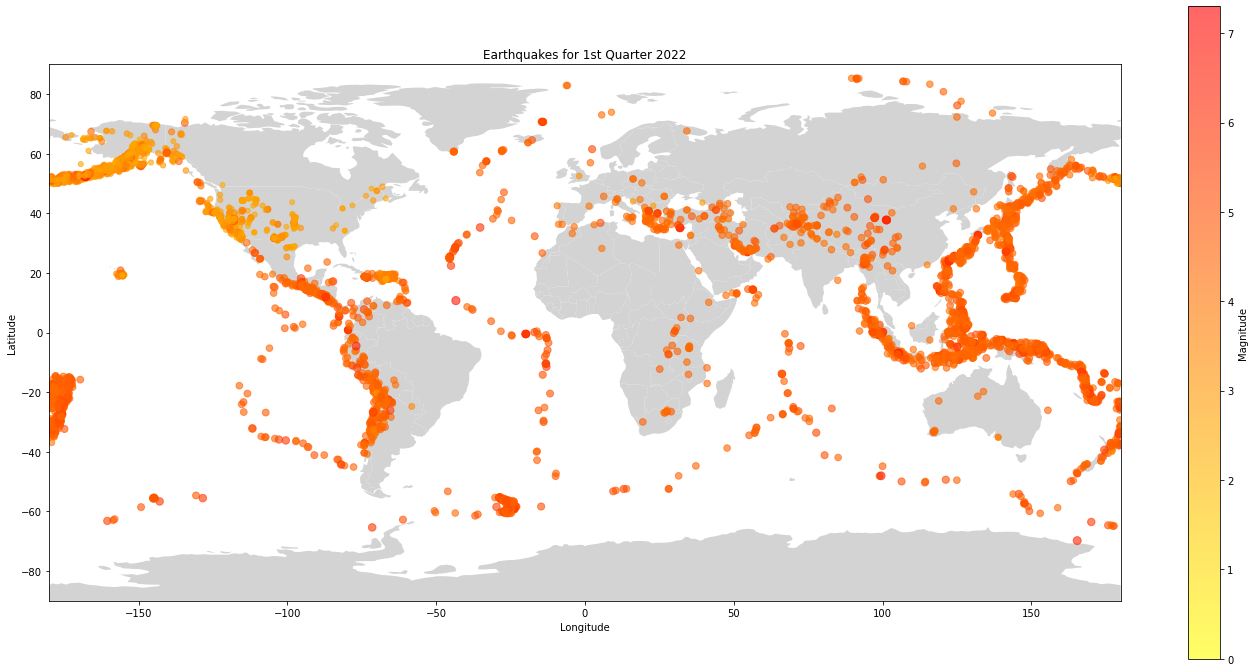

In [352]:
#To plot using geopandas on a worldmap
#Note:  Geopandas is not an easy application to install see README.md for help.  It is really cool for this map.
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize= (24, 12))
worldmap.plot(color="lightgrey", ax=ax)
x = df2['longitude']
y = df2['latitude']
z = df2['mag']
plt.scatter(x, y, s=10*z, c=z, alpha=0.6, vmin=0, cmap='autumn_r')
plt.colorbar(label='Magnitude')
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.title("Earthquakes for 1st Quarter 2022")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

The same areas along the tectonic plates have the highest magnitude of earthquakes.  With Namie, Japan having the highest magnitude at 7.3 and the next two highest magnitudes of 7.0, 6.9 near New Caledonia. (Includes from the data below for locations and magnitudes.)

What is the highest magnitude that occured during this quarter of 2022?

In [353]:
#To sort by magnitude in decending order
highest_mag = df2.sort_values("mag", ascending=False)
print(highest_mag)


                 time   latitude   longitude       depth  mag  \
1308  14:36:30.997000  37.713200  141.579300   41.000000  7.3   
81    05:44:01.146000 -22.586000  170.374400   10.000000  7.0   
123   20:56:58.105000 -22.666000  170.365900   10.000000  6.9   
3316  20:21:06.737000 -23.768200  179.998100  535.000000  6.8   
6337  11:35:43.674000  52.341500 -167.755400   20.000000  6.8   
...               ...        ...         ...         ...  ...   
1856  07:24:31.368000  44.265300 -115.093600   10.000000  2.5   
1859  06:48:24.692000  31.648821 -104.584651    7.185596  2.5   
5759  00:21:02.699000  63.035800 -151.659200    4.700000  2.5   
1877  20:52:43.191000  39.695300  -98.289900    5.000000  2.5   
0     23:47:44.170000  17.943333  -66.996500    5.770000  2.5   

                             place        date  
1308                  Namie, Japan  2022-03-16  
81                 Loyalty Islands  2022-03-31  
123          Tadine, New Caledonia  2022-03-30  
3316                  F

What is the mean, mode and median of the magnitudes?  So which days had earthquakes and which did not? What percentage of days had earthquakes?

In [354]:
#To Analyze data with computations

#To get the average magnitude of the first quater 2022 earthquakes
avg_mag = df2['mag'].mean()
print( 'The average magnitude of all earthquakes in the first quarter of 2022 is ', avg_mag)

#To get the median magnitude
middle_mag = df2['mag'].median()
print ('The center value of the magnitude rage is ', middle_mag)

#To get the mode of the earthquake magnitude
mode_eq = df2['mag'].mode()
print('The magnitude that occurs most frequently is ', mode_eq)

#To find which day has the most earthquake activity
mode_day = df2['date'].mode()
print('The most earthquake activty shows on ', mode_day)

#To aquire the total number of days that had earthquakes
total_days = df2.groupby(['date']).nunique().count()
print(total_days)

#To find what percent of the days in the first quarter had earthquakes (January 31, February 28, March 31 days for a total of 90 actual days for the first quarter 2022.)
percent_days = (total_days/(31+28+31)) * 100
print(percent_days)
print("Of the 90 days in the first quarter of 2022, we had an earthquake on each day.  Many times more than one earthquake per day worldwide.")

#Which place(s) had the most earthquake activity
location = df2.groupby(['place']).size().sort_values(ascending=False)
location


The average magnitude of all earthquakes in the first quarter of 2022 is  3.919119658119658
The center value of the magnitude rage is  4.2
The magnitude that occurs most frequently is  0    4.4
Name: mag, dtype: float64
The most earthquake activty shows on  0    2022-01-11
Name: date, dtype: object
time         90
latitude     90
longitude    90
depth        90
mag          90
place        90
dtype: int64
time         100.0
latitude     100.0
longitude    100.0
depth        100.0
mag          100.0
place        100.0
dtype: float64
Of the 90 days in the first quarter of 2022, we had an earthquake on each day.  Many times more than one earthquake per day worldwide.


place
Nikolski, Alaska                         271
South Sandwich Islands region            197
Adak, Alaska                             187
Rat Islands, Aleutian Islands, Alaska    139
Kermadec Islands region                  138
                                        ... 
Nikk?, Japan                               1
Nikolaevsk, Alaska                         1
Flores region, Indonesia                   1
Niland, CA                                 1
Loíza, Puerto Rico                         1
Length: 1356, dtype: int64

The average magnitude of all earthquakes in the first quarter is 3.919.  The median magnitude of the earthquakes is 4.2.  The most frequent magnitude is 4.4.  January 11, 2022, had the most earthquake activity.  Of the 90 days in the first quarter, we had at least one earthquake per day.  Nikolski, Alaska had the most earthquakes during the quarter at 271.  Alaska had three out of the top five locations for earthquake activity.

What magnitudes happen the most? and the least?

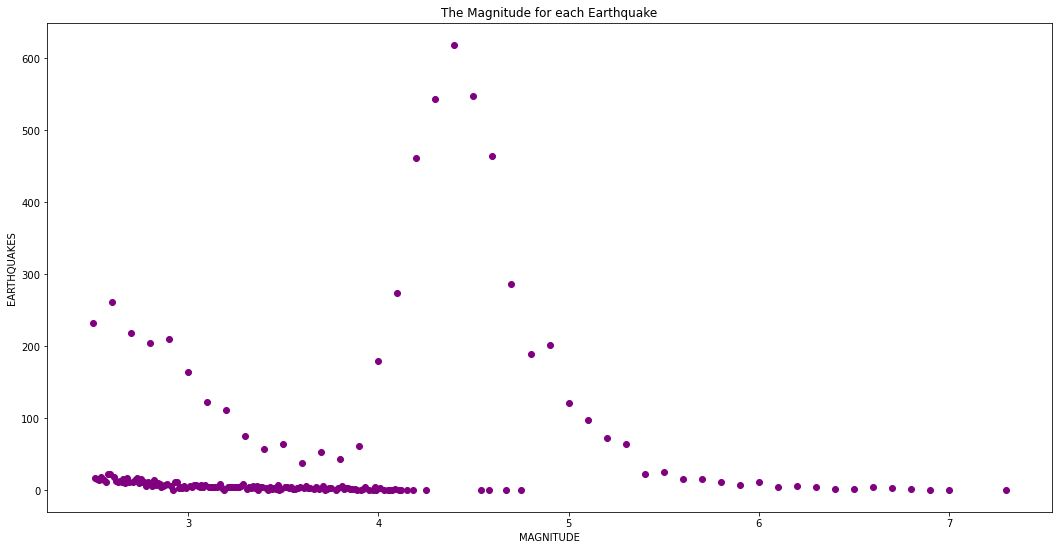

In [355]:
#Chart to show which magnitudes occur most frequently

highest = df2.groupby(['mag'], as_index= False).count()
plt.figure(figsize = (18,9))
plt.scatter(highest['mag'], highest['time'], color = 'purple')
plt.title("The Magnitude for each Earthquake")
plt.xlabel('MAGNITUDE')
plt.ylabel('EARTHQUAKES')
plt.show()

This graph shows that the above data returning that 4.4 was the most common magnitude earthquake for the January 1, 2022 to March 31, 2022 was over 600 times.  Many of the lower magnitude earthquakes are infrequent and  where the magnitudes of 4 to 5 ranges happen 300-550 times in 90 days.

How many earthquakes happen per day?

In [356]:
#To count the number of earthquakes per day in the period 01/01/2022 to 03/31/2022
by_day = df2.groupby('date').count()
by_day

,time,latitude,longitude,depth,mag,place
date,,,,,,
2022-01-01,51,51,51,51,51,51
2022-01-02,52,52,52,52,52,52
2022-01-03,62,62,62,62,62,62
2022-01-04,59,59,59,59,59,59
2022-01-05,77,77,77,77,77,77
...,...,...,...,...,...,...
2022-03-27,68,68,68,68,68,67
2022-03-28,68,68,68,68,68,68
2022-03-29,95,95,95,95,95,93


Which day was the most active?  Since there was an earthquake each day, which day had the least amount of earthquakes?

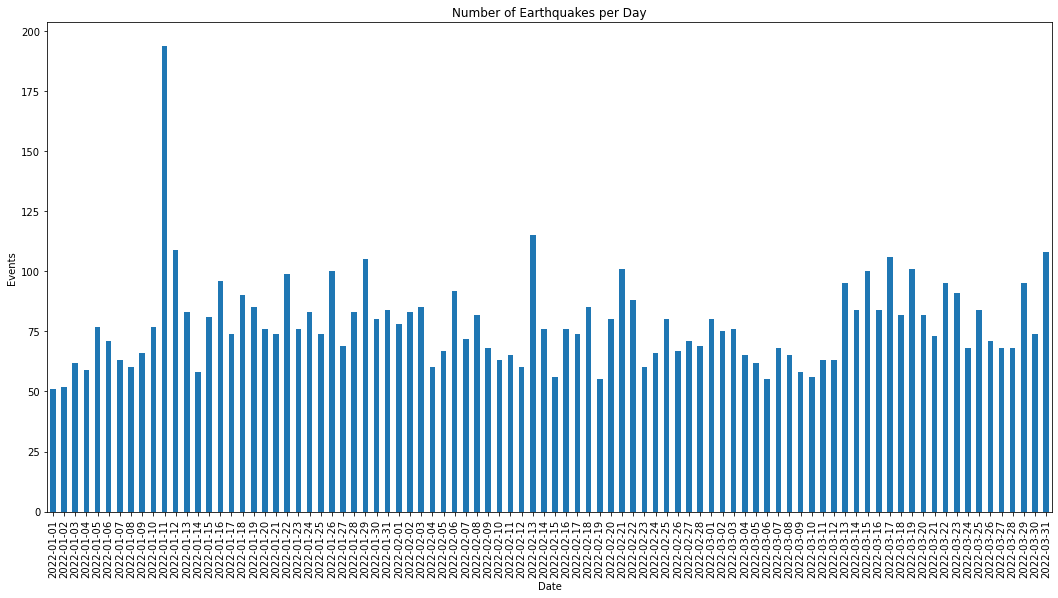

In [357]:
# Plot to show Earthquake events per day for 01/01/2022 to 03/31/2022
df2['date'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize = (18, 9))
plt.xlabel("Date")
plt.ylabel("Events")
plt.title("Number of Earthquakes per Day")
plt.show()       

January 11, 2022, claimed the most earthquake activity for the first quarter of 2022, with almost 200 earthquakes.  Second most earthquakes per day happened on February 13, 2022, with almost 125.  January 12, 2022, and March 31, 2022 follows with over 100 earthquakes on both days.